# Проверка встроенного ГСЧ

Задача: 
1) Построить столбчатую диаграмму распределния на 10 шагов.
2) Сравнить мат. ожидание, дисперсию и среднеквадратичное отклонение с табличными

Табличные значения равномерного распределения:
 
1) $ m_r = \frac{\sum_{i=1}^n r_i}{n} = \frac{1}{2} $
2) $ D_r = \frac{\sum_{i=1}^n (r_i - m_r)^2}{n} = \frac{1}{12} = 0.083 $
3) $ \sigma_r = \sqrt{D_r} = 0.288 $

In [355]:
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [356]:
sample = 100_000

In [357]:
def count_statistics(sample: int):
    """
    Подсчет основных статистик: мат.ожидание и дисперсия
    
    Касательно генератора равномерного распределения:
    https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
    
    mr - мат. ожидание
    dr - дисперсия
    return: Tuple[mr, dr, arr]
    """
    # from random import random
    from numpy.random import uniform as random
    mr: float = 0
    dr: float = 0
    
    arr = random(size=sample)
    mr += np.sum(arr) / sample
    dr += np.sum((arr - mr) ** 2) / sample
    
    return mr, dr, arr

In [358]:
mr, dr, arr_sample = count_statistics(sample)
sigma = math.sqrt(dr)

print(f"Мат. ожидание  = {mr:4.2f}")
print(f"Дисперсия      = {dr:5.30f}")
print(f"Ср. отклонение = {sigma:5.3f}")

Мат. ожидание  = 0.50
Дисперсия      = 0.083630374858105677171593583807
Ср. отклонение = 0.289


<AxesSubplot:ylabel='Frequency'>

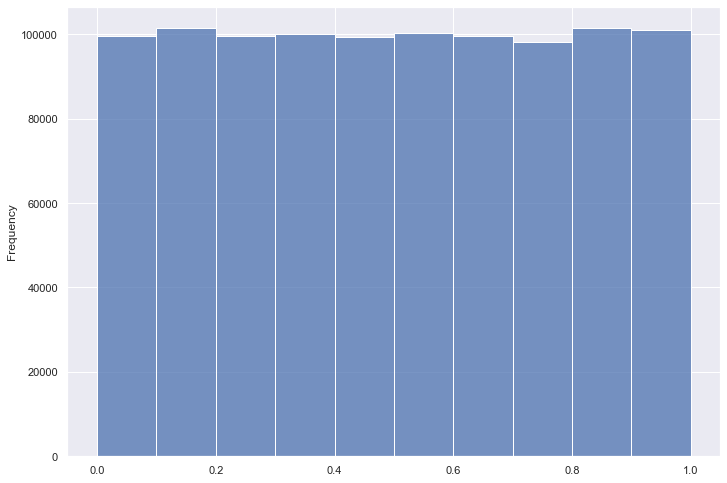

In [359]:
# построение графика
sns.set_theme(style="darkgrid")

sns.histplot(
    data=arr_sample,
    bins=10,
    stat="frequency",
)

# Построение собственного ГСЧ с нормальным законом распределения

Условия: 
1) Параметры для закона нормального распределения: $m = 0, \sigma = \Delta y$

## 1 метод - ЦПТ

* **Закон получения чисел**: $ V = \sum_{i = 1}^{n} r_i $, где $ n = 6$ или $ 12 $  

* **Нормализация**: $ Z = \frac{V - m_V}{\sigma_V}  $ 

Предполагаемые статистики будут равны:

1) $ m_V = \frac{n}{2} $
2) $ \sigma_V = \sqrt{\frac{n}{12}} $


In [360]:
# кол-во генирируемых чисел по равномерному закону
sample = 12

# колв-о генирируемых чисел для выборки по нормальному закону
size = 100_000

In [361]:
def generate_normal(size: int, sample: int):
    """
    size - кол-во генерируемых чисел по нормальному закону
    sample - кол-во генирируемых чисел по равномерному закону, которые
        будут использоваться для генерации чисел по нормальному закону
    """
    mv:float = sample / 2
    sv:float = math.sqrt(sample/12)
    normal_arr = []
    
    for _ in range(size):
        _, _, eq_arr = count_statistics(sample)
        normal_arr.append( 
            (np.sum(eq_arr) - mv) / sv
        )
    return normal_arr

In [362]:
arr_sample = generate_normal(size, sample)

In [363]:
mv = np.sum(arr_sample) / len(arr_sample)
dv = np.sum((np.array(arr_sample) - mv) ** 2) / len(arr_sample)
sv = np.sqrt(dv)

print(f"Мат. ожидание  = {mv:3.2f}")
print(f"Дисперсия      = {dv:5.3f}")
print(f"Ср. отклонение = {sv:5.3f}")

Мат. ожидание  = -0.00
Дисперсия      = 0.995
Ср. отклонение = 0.998


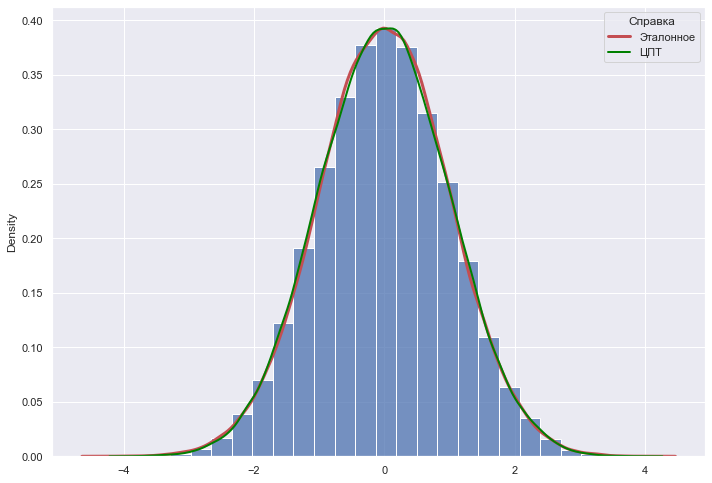

In [364]:
# построение графика:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_theme(style="darkgrid")

sns.histplot(
    data=arr_sample,
    bins=25,
    stat="density",
    legend=True
)

sns.kdeplot(
    np.random.normal(size=100_000),
    color='r',
    legend=True,
    linewidth=3
)

sns.kdeplot(
    arr_sample,
    color='green',
    legend=True,
    linewidth=2
)
plt.legend(title='Справка', labels=["Эталонное", "ЦПТ"])

## 2 метод - метод Мюллера

**Закон распределения**:
* $ Z_1 = \cos{(2\pi * r_1)} * \sqrt{-2 * ln(r_2)}$

или

* $ Z_2 = \sin{(2\pi * r_1)} * \sqrt{-2 * ln(r_2)}$

Статистики таких чисел будут равны:

1) $ m_V = 0 $
2) $ \sigma_V = 1 $

**Масштабирование**: 

$ x = z * \sigma_x + m_x $, где

$ \sigma_x = \Delta y = 0.05 * MAX_{табличный} |y(t)| $

y(t) брать из РГР-1.

**max y(t) для моей РГР-1 был равен 37.93984**

In [373]:
def generate_muller(size:int):
    """
    size - размер выборки
    """
    arr = []
    sx = 0.05 * 37.93984 # из РГР-1
    for _ in range(size // 2):
        _, _, arr_ = count_statistics(sample=2)
        z1: float = np.cos(2 * np.pi * arr_[0]) * np.sqrt(-2 * math.log(arr_[1]))
        z2: float = np.sin(2 * np.pi * arr_[0]) * np.sqrt(-2 * math.log(arr_[1]))
        arr.extend([z1 * sx, z2 * sx])
    return np.array(arr)

In [374]:
arr_muller = generate_muller(size=100_000)

In [375]:
mx = np.sum(arr_muller) / len(arr_muller)
dx = np.sum((np.array(arr_muller) - mx) ** 2) / len(arr_muller)
sx = np.sqrt(abs(dx))

print(f"Мат. ожидание  = {mx:3.2f}")
print(f"Дисперсия      = {dx:5.3f}")
print(f"Ср. отклонение = {sx:5.3f}")

Мат. ожидание  = -0.01
Дисперсия      = 3.610
Ср. отклонение = 1.900


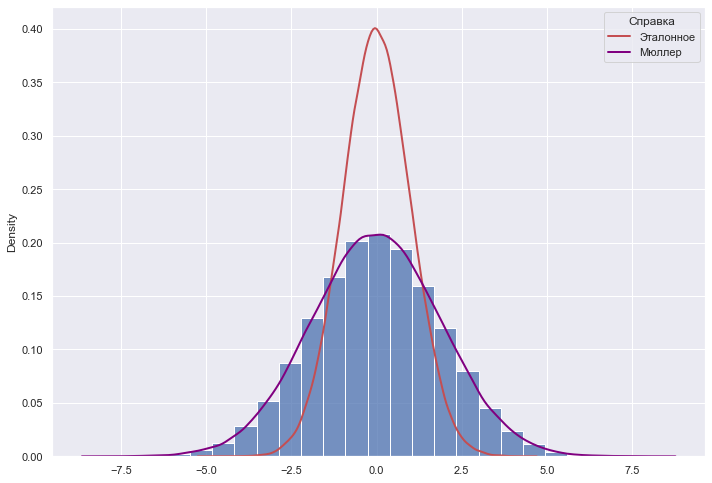

In [376]:
# построение графика:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_theme(style="darkgrid")

sns.histplot(
    data=arr_muller,
    bins=25,
    stat="density",
    legend=True
)
sns.kdeplot(
    np.random.normal(size=100_000),
    color='r',
    legend=True,
    linewidth=2
)

sns.kdeplot(
    arr_muller,
    color='purple',
    legend=True,
    linewidth=2
)

plt.legend(title='Справка', labels=["Эталонное", "Мюллер"])

# Вывод о построении собственного ГСЧ

Лучше использовать метод, применимый вместе с ЦПТ, так как он более близок к эталонному нормальному распредлелению